In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/BreastCancer.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop('Unnamed: 32', axis=1,inplace=True)

In [ ]:
data.replace({'diagnosis':{'B':0, 'M':1}}, inplace=True)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
X = data.drop(columns = ['diagnosis', 'id'], axis=1)
Y = data['diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building Neural Network

In [ ]:
import tensorflow as tf

tf.random.set_seed(3)

from tensorflow import keras

In [ ]:
# setting up the layers of  the neural network

model = keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 17ms/step - loss: 0.1246 - accuracy: 0.9707 - val_loss: 0.0971 - val_accuracy: 0.9783
Epoch 2/10
13/13 [==============================] - 0s 12ms/step - loss: 0.1170 - accuracy: 0.9707 - val_loss: 0.0889 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 0s 13ms/step - loss: 0.1113 - accuracy: 0.9707 - val_loss: 0.0818 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 0s 19ms/step - loss: 0.1059 - accuracy: 0.9731 - val_loss: 0.0759 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 14ms/step - loss: 0.1015 - accuracy: 0.9780 - val_loss: 0.0711 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0973 - accuracy: 0.9780 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0938 - accuracy: 0.9780 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 8/10
13

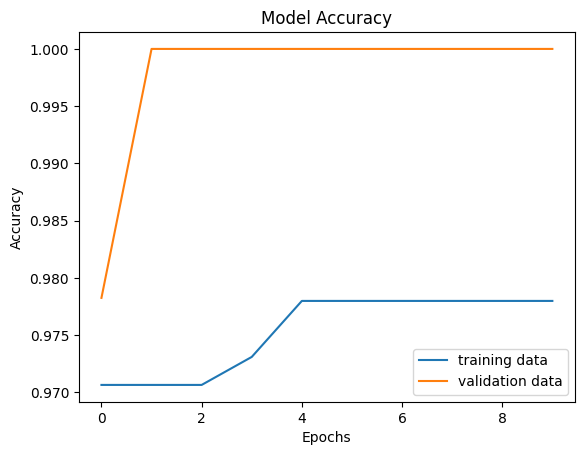

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training data', 'validation data'], loc ='lower right')

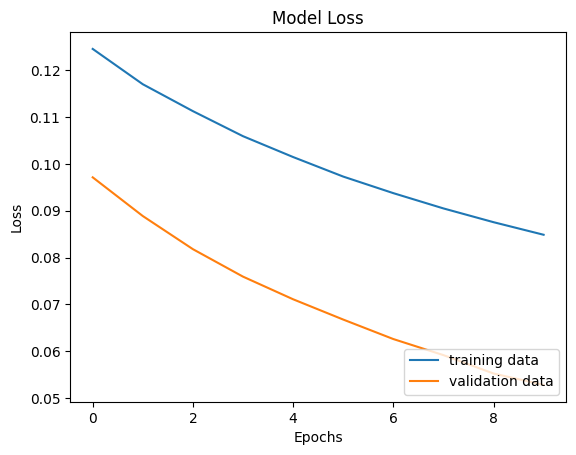

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training data', 'validation data'], loc ='lower right')

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Loss = ',loss)
print('Accuracy = ', accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.0678 - accuracy: 0.9737
Loss =  0.0678243339061737
Accuracy =  0.9736841917037964


In [ ]:
X_test[100]

array([ 1.83211616,  0.49900603,  1.8846508 ,  1.82438006,  1.48901401,
        1.62985879,  2.21548764,  2.71550507,  2.769398  ,  0.59851114,
        0.61906686, -0.37596241,  0.6162932 ,  0.67896416, -0.53877407,
       -0.05259818,  0.02241395,  0.32978727,  0.87944243, -0.16795636,
        1.88642841,  1.0049162 ,  1.92676916,  1.88203547,  1.16260929,
        1.27390256,  1.28548799,  2.35656544,  4.29138361,  1.07413798])

In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
Y_pred.shape

(114, 2)

In [ ]:
Y_pred[100]

array([0.0419623 , 0.99975127], dtype=float32)

In [ ]:
input = [ 1.83211616,  0.49900603,  1.8846508 ,  1.82438006,  1.48901401,
        1.62985879,  2.21548764,  2.71550507,  2.769398  ,  0.59851114,
        0.61906686, -0.37596241,  0.6162932 ,  0.67896416, -0.53877407,
       -0.05259818,  0.02241395,  0.32978727,  0.87944243, -0.16795636,
        1.88642841,  1.0049162 ,  1.92676916,  1.88203547,  1.16260929,
        1.27390256,  1.28548799,  2.35656544,  4.29138361,  1.07413798]

input = np.asarray(input)
input = input.reshape(1,-1)

pred = model.predict(input)

index = np.argmax(pred)

if index == 0:
  prediction = 'Benign'
else:
  prediction = 'Malignant'

print(prediction)

1/1 [==============================] - 0s 60ms/step
Malignant
